# MMA/MMAB 869 2024: Individual Assignment


<font color='red'>\# TODO: fill in the below</font>

- Ramelo, Anthony
- 20499391
- MMAS 2025 869
- November 29,2024

# Assignment Instructions

This assignment contains four questions. The questions are fully contained in this Google Colab Notebook.

You are to make a copy of this Notebook and edit the copy to provide your answers. You are to complete the assignment entirely within Google Colab. Why?

- It gives you practice using cloud-based interactive notebook environments (which is a popular workflow)
- It is easier for you to manage the environment (e.g., installing packages, etc.)
- Google Colab has nice, beefy machines, so you don't have to worry about running out of memory on your local computer.
- It will be easier for the TA to help you debug your code if you need help
- It will be easier for the TA to mark/run your code

Some parts of this assigment require you to write code. Use Python or R. For Python, you may use standard Python libraries, including `scikit-learn`, `pandas`, `numpy`, and `scipy`. For R, you may use `dplyr`, `caret`, `ggplot2`, `rpart` and other standard libraries.

Some parts of this assignment require text responses. In these cases, type your response in the Notebook cell indicated. Use English. Use proper grammar, spelling, and punctuation. Be professional and clear. Be complete, but not overly-verbose. Feel free to use [Markdown syntax](https://www.markdownguide.org/basic-syntax/) to format your answer (i.e., add bold, italics, lists, tables).

## What to Submit to the Course Portal

- Export your completed Notebook as a PDF file by clicking File->Print->Save as PDF.
- Please do not submit the Notebook file (`.ipynb`) to the course portal.
- Please submit the PDF export of the Notebook.
   - Please name the PDF file `2024_869_FirstnameLastName.pdf`
      - E.g., `869_NasrinYousefi.pdf`
   - Please make sure you have run all the cells so we can see the output!
   - Best practice: Before exporting to PDF click Runtime->Restart and run all.



# Preliminaries: Inspect and Set up environment

No action is required on your part in this section. These cells print out helpful information about the environment, just in case.

In [1]:
import datetime
import pandas as pd
import numpy as np

In [2]:
print(datetime.datetime.now())

2024-11-30 14:59:48.865399


In [3]:
!which python

/opt/anaconda3/bin/python


In [4]:
!python --version

Python 3.11.7


In [5]:
!echo $PYTHONPATH

In [6]:
# TODO: install any packages you need to here. For example:
#pip install unidecode

# Question 1: Uncle Steve's Diamonds

## Instructions

You work at a local jewelry store named *Uncle Steve's Diamonds*. You started as a janitor, but you’ve recently been promoted to senior data analyst. Congratulations!

Uncle Steve, the store's owner, needs to better understand the store's customers. In particular, he wants to know what kind of customers shop at the store. He wants to know the main types of *customer personas*. Once he knows these, he will contemplate ways to better market to each persona, better satisfy each persona, better cater to each persona, increase the loyalty of each persona, etc. But first, he must know the personas.

You want to help Uncle Steve. Using sneaky magic (and the help of Environics), you've collected four useful features for a subset of the customers: age, income, spending score (i.e., a score based on how much they’ve spent at the store in total), and savings (i.e., how much money they have in their bank account).

**Your tasks**

1. Pick a clustering algorithm (the [`sklearn.cluster`](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.cluster) module has many good choices, including [`KMeans`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans), [`DBSCAN`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html#sklearn.cluster.DBSCAN), and [`AgglomerativeClustering`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html#sklearn.cluster.AgglomerativeClustering) (aka Hierarchical)). (Note that another popular implementation of the hierarchical algorithm can be found in SciPy's [`scipy.cluster.hierarchy.linkage`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html).) Don't spend a lot of time thinking about which algorithm to choose - just pick one. Cluster the customers as best as you can, within reason. That is, try different feature preprocessing steps, hyperparameter values, and/or distance metrics. You don't need to try every posssible combination, but try a few at least. Measure how good each  model configuration is by calculating an internal validation metric (e.g., [`calinski_harabasz_score`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.calinski_harabasz_score.html) or [`silhouette_score`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html#sklearn.metrics.silhouette_score)).
2. You have some doubts - you're not sure if the algorithm you chose in part 1 is the best algorithm for this dataset/problem. Neither is Uncle Steve. So, choose a different algorithm (any!) and do it all again.
3. Which clustering algorithm is "better" in this case? Think about charateristics of the algorithm like quality of results, ease of use, speed, interpretability, etc. Choose a "winner" and justify to Uncle Steve.
4. Interpret the clusters of the winning model. That is, describe, in words, a *persona* that accurately depicts each cluster. Use statistics (e.g., cluster means/distributions), examples (e.g., exemplar instances from each cluster), and/or visualizations (e.g., relative importance plots, snakeplots) to get started. Human judgement and creativity will be necessary. This is where it all comes together. Be descriptive and *help Uncle Steve understand his customers better*. Please!

**Marking**

The coding parts (i.e., 1 and 2) will be marked based on:

- *Correctness*. Code clearly and fully performs the task specified.
- *Reproducibility*. Code is fully reproducible. I.e., you (and I) are able to run this Notebook again and again, from top to bottom, and get the same results each time.
- *Style*. Code is organized. All parts commented with clear reasoning and rationale. No old code laying around. Code easy to follow.

Parts 3 and 4 will be marked on:

- *Quality*. Response is well-justified and convincing. Responses uses facts and data where possible.
- *Style*. Response uses proper grammar, spelling, and punctuation. Response is clear and professional. Response is complete, but not overly-verbose. Response follows length guidelines.


**Tips**

- Since clustering is an unsupervised ML technique, you don't need to split the data into training/validation/test or anything like that. Phew!
- On the flip side, since clustering is unsupervised, you will never know the "true" clusters, and so you will never know if a given algorithm is "correct." There really is no notion of "correctness" - only "usefullness."
- Many online clustering tutorials (including some from Uncle Steve) create flashy visualizations of the clusters by plotting the instances on a 2-D graph and coloring each point by the cluster ID. This is really nice and all, but it can only work if your dataset only has exactly two features - no more, no less. This dataset has more than two features, so you cannot use this technique. (But that's OK - you don't need to use this technique.)
- Must you use all four features in the clustering? Not necessarily, no. But "throwing away" quality data, for no reason, is unlikely to improve a model.
- Some people have success applying a dimensionality reduction technique (like [`sklearn.decomposition.PCA`](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)) to the features before clustering. You may do this if you wish, although it may not be as helpful in this case because there are only four features to begin with.
- If you apply a transformation (e.g., [`MinMaxScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) or [`StandardScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler)) to the features before clustering, you may have difficulty interpretting the means of the clusters (e.g., what is a mean Age of 0.2234??). There are two options to fix this: first, you can always reverse a transformation with the `inverse_transform` method. Second, you can just use the original dataset (i.e., before any preprocessing) during the interpreation step.
- You cannot change the distance metric for K-Means. (This is for theoretical reasons: K-Means only works/makes sense with Euclidean distance.)


## 1.0: Load data

In [7]:
# DO NOT MODIFY THIS CELL
df1 = pd.read_csv("https://drive.google.com/uc?export=download&id=1thHDCwQK3GijytoSSZNekAsItN_FGHtm")
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            505 non-null    int64  
 1   Income         505 non-null    int64  
 2   SpendingScore  505 non-null    float64
 3   Savings        505 non-null    float64
dtypes: float64(2), int64(2)
memory usage: 15.9 KB


## 1.1: Clustering Algorithm #1

   Age  Income  SpendingScore       Savings  Cluster
0   58   77769       0.791329   6559.829923        2
1   59   81799       0.791082   5417.661426        2
2   62   74751       0.702657   9258.992965        2
3   59   74373       0.765680   7346.334504        2
4   87   17760       0.348778  16869.507130        0
K Means:  0.6782348405719982


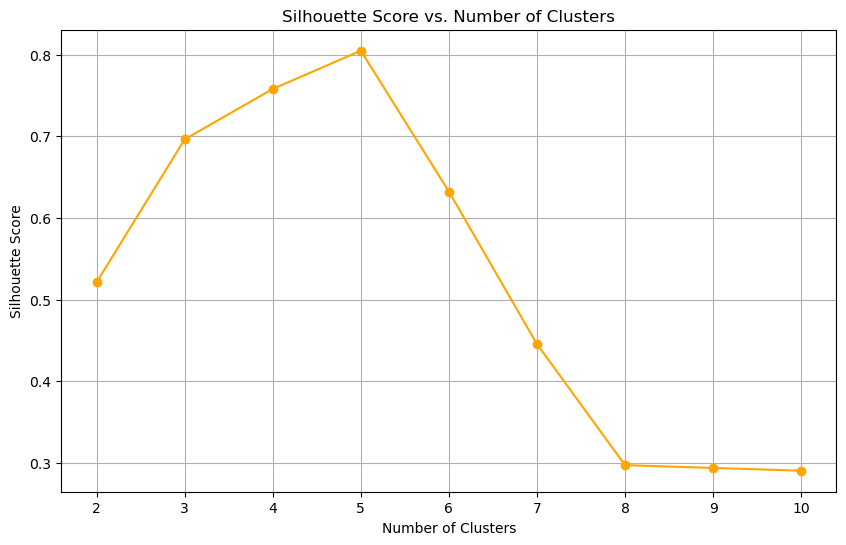

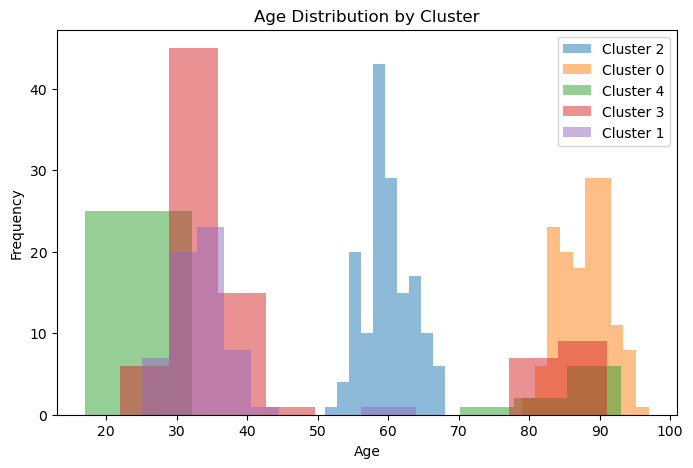

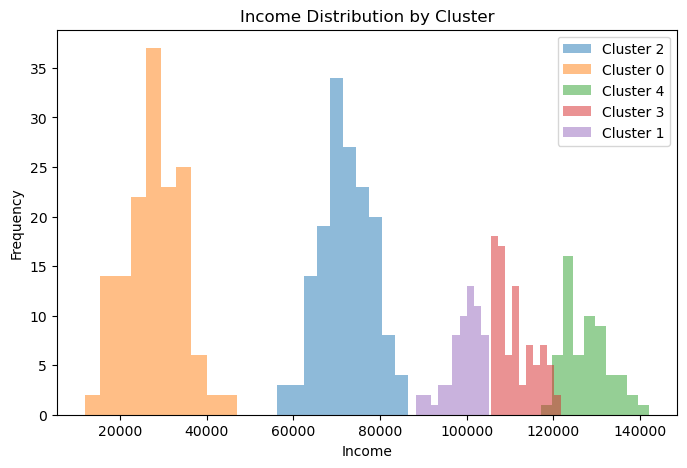

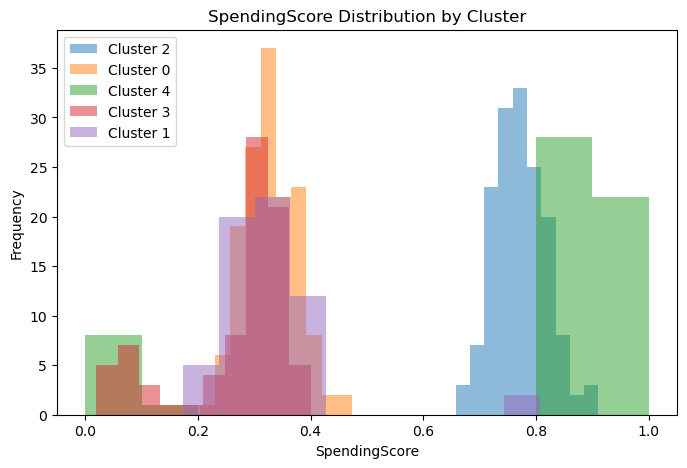

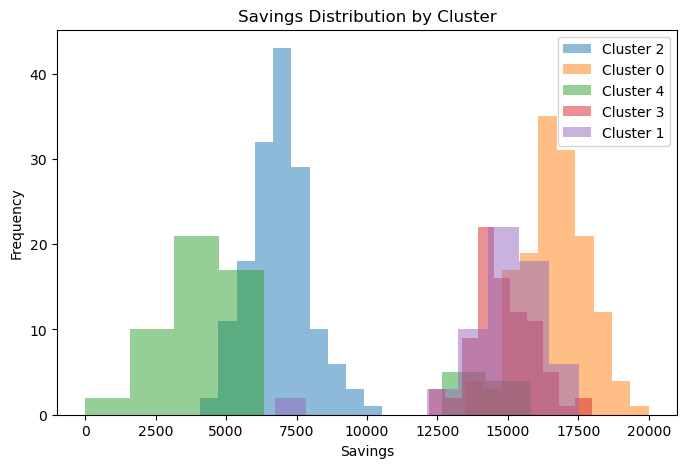

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

scaler = StandardScaler()
data_scaled = scaler.fit_transform(df1)

# Apply KMeans clustering - We have applied 5 clusters since it is the optimal number from the elbow method
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans_labels = kmeans.fit_predict(df1)

# Evaluate the clustering using silhouette score
silhouette_avg = silhouette_score(df1, kmeans_labels)

# Add the cluster labels back to the original dataframe for interpretation
df1['Cluster'] = kmeans_labels

# Output the silhouette score and the first few rows with clusters
print(df1.head(5))
print('K Means: ',silhouette_avg)

# Ideal Number of clusters
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

# Elbow Method
inertia = []
silhouette_scores = []
cluster_range = range(2, 11)  # Test cluster sizes from 2 to 10

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(data_scaled, kmeans.labels_))

# Plot the Silhouette Scores
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, silhouette_scores, marker='o', color='orange')
plt.title('Silhouette Score vs. Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

cluster_summary = df1.groupby('Cluster').mean()

import matplotlib.pyplot as plt
for feature in ['Age', 'Income', 'SpendingScore', 'Savings']:
    plt.figure(figsize=(8, 5))
    for cluster in df1['Cluster'].unique():
        subset = df1[df1['Cluster'] == cluster]
        plt.hist(subset[feature], alpha=0.5, label=f'Cluster {cluster}')
    plt.title(f'{feature} Distribution by Cluster')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()


## 1.2: Clustering Algorithm #

Agglomerative Clustering Silhouette Score: 0.8048976287755765
Cluster Summary Statistics:
                             Age         Income  SpendingScore       Savings  \
Agglomerative_Cluster                                                          
0                      87.775510   27866.102041       0.328800  16659.261445   
1                      59.955414   72448.063694       0.771518   6889.972190   
2                      32.777778  105265.809524       0.309926  14962.778066   
3                      24.180000  128029.120000       0.896892   4087.520309   
4                      86.000000  119944.040000       0.068378  14808.683793   

                        Cluster  
Agglomerative_Cluster            
0                      0.000000  
1                      1.987261  
2                      2.063492  
3                      4.000000  
4                      3.360000  


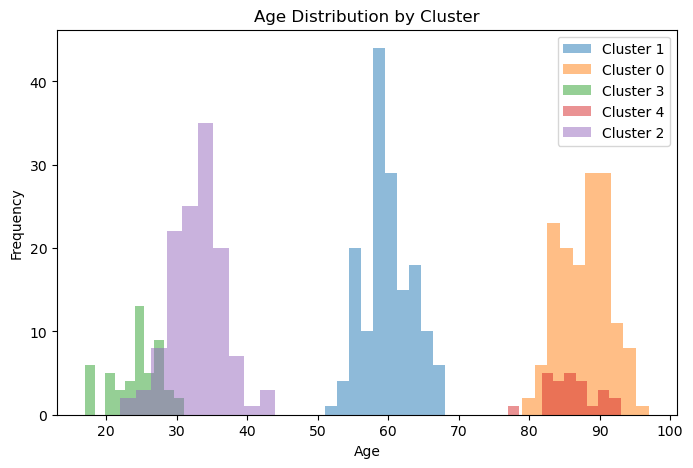

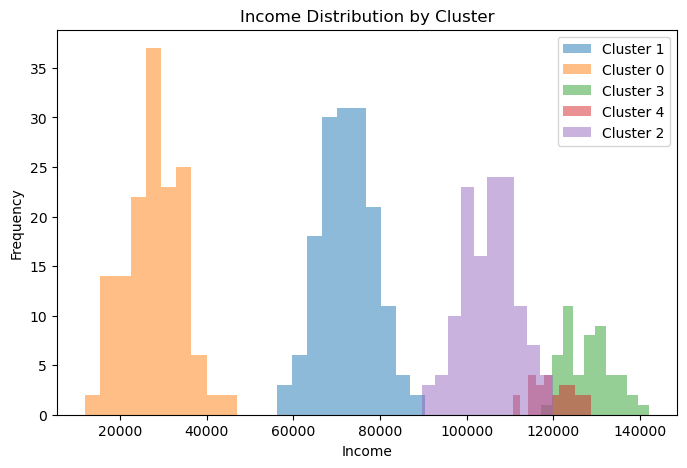

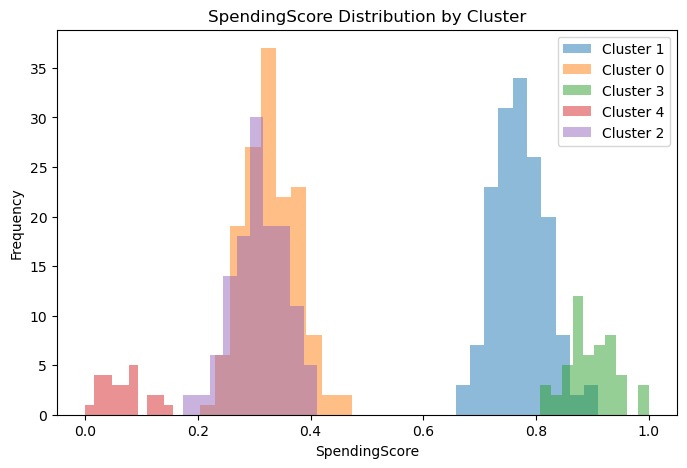

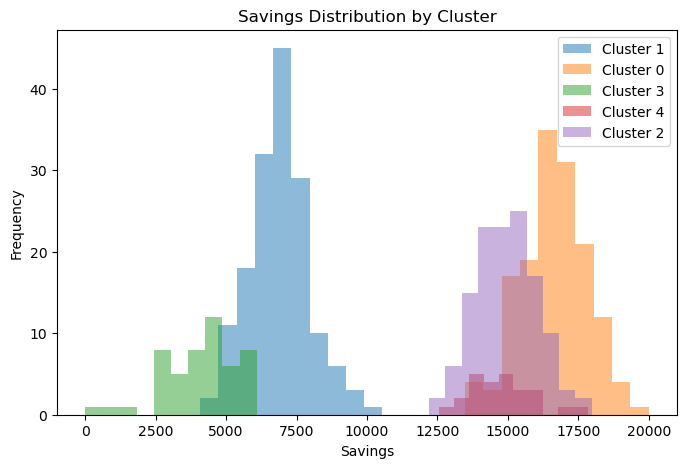

In [9]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

# Apply Agglomerative Clustering with 5 clusters
agg_cluster = AgglomerativeClustering(n_clusters=5)
agg_labels = agg_cluster.fit_predict(data_scaled)  # Fit the model and predict clusters

# Add the Agglomerative Clustering labels to the dataset
df1['Agglomerative_Cluster'] = agg_labels

# Calculate silhouette score for Agglomerative Clustering
silhouette_score_agg = silhouette_score(data_scaled, agg_labels)

# Display the first few rows of the dataset and the silhouette score
print('Agglomerative Clustering Silhouette Score:', silhouette_score_agg)

# Group data by clusters for summary statistics
cluster_summary = df1.groupby('Agglomerative_Cluster').mean()
print("Cluster Summary Statistics:")
print(cluster_summary)

# Visualize feature distributions by cluster
for feature in ['Age', 'Income', 'SpendingScore', 'Savings']:
    plt.figure(figsize=(8, 5))
    for cluster in df1['Agglomerative_Cluster'].unique():
        subset = df1[df1['Agglomerative_Cluster'] == cluster]
        plt.hist(subset[feature], alpha=0.5, label=f'Cluster {cluster}')
    plt.title(f'{feature} Distribution by Cluster')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

## 1.3 Model Comparison

Agglomerative Clustering is the better choice due to its Silhouette score of 80.489% compared to K Means which had a score of 67.823%.

K Means - Works best with large datasets and when the dataset clusters are compact and spherical. In this case, the data may have irregular shapes thus having a Silhouette score of 67.823%.

Agglomerative Clustering - It is flexible and can handle irregular shapes. It is an hierarchical algorith, that merges data points into clusters iteratively. It does not assume any specific cluster shape unlike K means. The data provided may have irregular shapes thus Agglomerative clustering performed better with a Silhouette score of 80.489%

## 1.4 Personas

#### Cluster 1 - About to retire (low income)	
    - Age: Predominantly older individuals, 50 - 70 years old.
    - Income: Around the average income, 60,000 - 90,000
    - Spending Score: High spending 
    - Savings: Low to medium savings

#### Cluster 2: Retired
    - Age: Older group of individuals, 80 - 100 years old.
	- Income: low-income earners.
	- Spending Score: low to medium spending,
	- Savings: Lots of savings.

#### Cluster 3: Experienced Professional
	- Age: Middle-aged, generally 30–50 years old.
	- Income: Moderate to High income.
	- Spending Score: Low to moderate spending.
	- Savings: High savings, likely saving for there family.


#### Cluster 4: Young Professional in Finance
	- Age: Primarily younger individuals (20–30 years old).
	- Income: Very high income.
	- Spending Score: High spending.
	- Savings: Little savings. They are spending as much as they make.

#### Cluster 5: About to retire (High Income)
    - Age: Older individuals, 50 - 70 years old.
    - Income: Around the average income, 60,000 - 90,000
    - Spending Score: low spending, living a frugal lifestyle
    - Savings: High savings,

# Question 2: Uncle Steve's Fine Foods

## Instructions

Uncle Steve runs a small, local grocery store in Ontario. The store sells all the normal food staples (e.g., bread, milk, cheese, eggs, more cheese, fruits, vegatables, meat, fish, waffles, ice cream, pasta, cereals, drinks), personal care products (e.g., toothpaste, shampoo, hair goo), medicine, and cakes. There's even a little section with flowers and greeting cards! Normal people shop here, and buy normal things in the normal way.

Business is OK but Uncle Steve wants more. He's thus on the hunt for customer insights. Given your success at the jewelry store, he has asked you to help him out.

He has given you a few years' worth of customer transactions, i.e., sets of items that customers have purchased. You have applied an association rules learning algorithm (like Apriori) to the data, and the algorithm has generated a large set of association rules of the form `{X} -> {Y}`, where `{X}` and `{Y}` are item-sets.

Now comes a thought experiment. For each of the following scenarios, state what one of the discovered association rules might be that would meet the stated condition. (Just make up the rule, using your human experience and intuition.) Also, describe whether and why each rule would be considered interesting or uninteresting for Uncle Steve (i.e., is this insight new to him? Would he be able to use it somehow?).

Keep each answer to 600 characters or less (including spaces).

To get those brain juices going, an example condition and answer is provided below:

> Condition: A rule that has high support.

> Answer: The rule `{milk} -> {bread}` would have high support, since milk and bread are household staples and a high percentage of transactions would include both `{milk}` and `{bread}`. Uncle Steve would likely not find this rule interesting, because these items are so common, he would have surely already noticed that so many transactions contain them.

**Marking**

Your responses will be marked as follows:

- *Correctness*. Rule meets the specificed condition, and seems plausible in an Ontario grocery store.
- *Justification of interestness*. Response clearly describes whether and why the rule would be considered interesting to Uncle Steve.

**Tips**

- There is no actual data for this question. This question is just a thought exercise. You need to use your intuition, creatitivty, and understanding of the real world. I assume you are familiar with what happens inside of normal grocery stores. We are not using actual data and you do not need to create/generate/find any data. I repeat: there is no data for this question.
- The reason this question is having you do a thought experiment, rather than writing and running code to find actual association rules on an actual dataset, is because writing code to find association rules is actually pretty easy. But using your brain to come up with rules that meet certain criteria, on the other hand, is a true test of whether you understand how the algorithm works, what support and confidence mean, and the applicability of rules. The question uses the grocery store context because most, if not all, students should be familiar from personal experience.



## 2.1: A rule that might have high support and high confidence.

{Eggs, Bacon} -> {Bread}

Eggs and bacon are common breakfast foods along with bread that are purchased together. This has high support because a large percentage of transactions are likely to include these items. This has high confidence because customers who buy eggs and bacon are very likely going to buy bread as well. This maybe interesting to Steve because he maybe want to position a type of drink like orange juice near by. 

## 2.2: A rule that might have reasonably high support but low confidence.

{Snacks} -> {Drinks}

Snacks are common is a common item bought in a grocery store. Making it have high support. But people sho buy snacks not always buy a drink with it. This maybe interesting to Steve because if he has a shop near a movie theatre he maybe able to combo these items together for a deal.

## 2.3: A rule that might have low support and low confidence.

{Pasta Sauce} -> {Meatballs}

Past Sauce is a common item to buy in a grocery store, but buying meatballs with pasta sauce is less frequent because there are many types of meats that go well with pasta sauce. This maybe interesting to Steve because near the meats section he could place the pasta sauces so that when consumers buy meats they could get ideas of different pasta sauces go well together.

## 2.4: A rule that might have low support and high confidence.

{Rose} -> {Chocolate}

Roses are not a common thing to buy since it usually only during one day of the year (Valentines Day). But when people buy a rose there is a high confidence that they will also but Chocolate with it. This is interesting to Steve because during valentines day, Steve could bundle these items together on that special day to have high sales.

# Question 3: Uncle Steve's Credit Union

## Instructions

Uncle Steve has recently opened a new credit union in Kingston, named *Uncle Steve's Credit Union*. He plans to disrupt the local market by instaneously providing credit to customers.

The first step in Uncle Steve's master plan is to create a model to predict whether an application has *good risk* or *bad risk*. He has outsourced the creation of this model to you.

You are to create a classification model to predict whether a loan applicant has good risk or bad risk. You will use data  that Uncle Steve bought from another credit union (somewhere in Europe, he thinks?) that has around 6000 instances and a number of demographics features (e.g., `Sex`, `DateOfBirth`, `Married`), loan details (e.g., `Amount`, `Purpose`), credit history (e.g., number of loans), as well as an indicator (called `BadCredit` in the dataset) as to whether that person was a bad risk.


**Your tasks**

To examine the effects of the various ML stages, you are to create the model several times, each time adding more sophistication, and measuring how much the model improved (or not). In particular, you will:

0. Split the data in training and testing. Don't touch the testing data again, for any reason, until step 5. We are pretending that the testing data is "future, unseen data that our model won't see until production." I'm serious, don't touch it. I'm watching you!
1. Build a baseline model - no feature engineering, no feature selection, no hyperparameter tuning (just use the default settings), nothing fancy. (You may need to do some basic feature transformations, e.g., encoding of categorical features, or dropping of features you do not think will help or do not want to deal with yet.) Measure the performance using K-fold cross validation (recommended: [`sklearn.model_selection.cross_val_score`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html#sklearn.model_selection.cross_val_score)) on the training data. Use at least 5 folds, but more are better. Choose a [`scoring` parameter](https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter) (i.e., classification metric) that you feel is appropriate for this task. Don't use accuracy. Print the mean score of your model.
2. Add a bit of feature engineering. The [`sklearn.preprocessing`](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing) module contains many useful transformations. Engineer at least three new features. They don't need to be especially ground-breaking or complicated. Dimensionality reduction techniques like [`sklearn.decomposition.PCA`](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) are fair game but not required. (If you do use dimensionality reduction techniques, it would only count as "one" new feature for the purposes of this assignment, even though I realize that PCA creates many new "features" (i.e., principal components).) Re-train your baseline model. Measure performance. Compare to step 1.
3. Add feature selection. The [`sklearn.feature_selection`](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.feature_selection) has some algorithms for you to choose from. After selecting features, re-train your model, measure performance, and compare to step 2.
4. Add hyperparameter tuning. Make reasonable choices and try to find the best (or at least, better) hyperparameters for your estimator and/or transformers. It's probably a good idea to stop using `cross_val_score` at this point and start using [`sklearn.model_selection.GridSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV) as it is specifically built for this purpose and is more convienient to use. Measure performance and compare to step 3.
5. Finally, using your findings from the previous steps, estimate how well your model will work in production. Use the testing data (our "future, unseen data") from step 0. Transform the data as appropriate (easy if you've built a pipeline, a little more difficult if not), use the model from step 4 to get predictions, and measure the performance. How well did we do?


**Marking**

Each part will be marked for:
- *Correctness*. Code clearly and fully performs the task specified.
- *Reproducibility*. Code is fully reproducible. I.e., you (and I) should be able to run this Notebook again and again, from top to bottom, and get the same results each and every time.
- *Style*. Code is organized. All parts commented with clear reasoning and rationale. No old code laying around. Code easy to follow.


**Tips**
- The origins of the dataset are a bit of a mystery. Assume the data set is recent (circa 2022) and up-to-date. Assume that column names are correct and accurate.
- You don't need to experiment with more than one algorithm/estimator. Just choose one (e.g., [`sklearn.tree.DecisionTreeClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier), [`sklearn.ensemble.RandomForestClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier), [`sklearn.linear_model.LogisticRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression), [`sklearn.svm.LinearSVC`](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC), whatever) and stick with it for this question.
- There is no minimum accuracy/precision/recall for this question. I.e., your mark will not be based on how good your model is. Rather, you mark will be based on good your process is.
- Watch out for data leakage and overfitting. In particular, be sure to `fit()` any estimators and transformers (collectively, *objects*) only to the training data, and then use the objects' `transform()` methods on both the training and testing data. [Data School](https://www.youtube.com/c/dataschool/featured) has a [helpful video](https://www.youtube.com/watch?v=g2XsZdwbCCs) about this. [Pipelines](https://www.youtube.com/watch?v=1Y6O9nCo0-I) are very helpful here and make your code shorter and more robust (at the expense of making it harder to understand), and I recommend using them, but they are not required for this assignment.
- Create as many code cells as you need. In general, each cell should do one "thing."
-	Don't print large volumes of output. E.g., don't do: `df.head(100)`




## 3.0: Load data and split

In [10]:
# DO NOT MODIFY THIS CELL

# First, we'll read the provided labeled training data
df3 = pd.read_csv("https://drive.google.com/uc?export=download&id=1wOhyCnvGeY4jplxI8lZ-bbYN3zLtickf")
df3.info()

from sklearn.model_selection import train_test_split

X = df3.drop('BadCredit', axis=1) #.select_dtypes(['number'])
y = df3['BadCredit']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   UserID             6000 non-null   object
 1   Sex                6000 non-null   object
 2   PreviousDefault    6000 non-null   int64 
 3   FirstName          6000 non-null   object
 4   LastName           6000 non-null   object
 5   NumberPets         6000 non-null   int64 
 6   PreviousAccounts   6000 non-null   int64 
 7   ResidenceDuration  6000 non-null   int64 
 8   Street             6000 non-null   object
 9   LicensePlate       6000 non-null   object
 10  BadCredit          6000 non-null   int64 
 11  Amount             6000 non-null   int64 
 12  Married            6000 non-null   int64 
 13  Duration           6000 non-null   int64 
 14  City               6000 non-null   object
 15  Purpose            6000 non-null   object
 16  DateOfBirth        6000 non-null   object


## 3.1: Baseline model

In [20]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import make_scorer, f1_score

# Drop irrelevant columns
irrelevant_columns = ['UserID', 'FirstName', 'LastName', 'Street', 'LicensePlate', 'City', 'DateOfBirth']
data_cleaned = df3.drop(columns=irrelevant_columns)

# Encode categorical variables (e.g., 'Sex', 'Purpose', 'Married')
data_encoded = pd.get_dummies(data_cleaned, drop_first=True)  # One-hot encoding for categorical variables

# Separate features and target variable
X = data_encoded.drop(columns=['BadCredit'])  # Features
y = data_encoded['BadCredit']  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize the baseline model (Random Forest)
baseline_model = RandomForestClassifier(random_state=42)

# Perform 5-fold cross-validation and calculate F1-score
scoring = make_scorer(f1_score, pos_label=1)  # F1-score for the positive class
cv_scores = cross_val_score(baseline_model, X_train, y_train, cv=5, scoring=scoring)

# Output the mean F1-score for the baseline model
baseline_f1_score = np.mean(cv_scores)
print(f"Baseline Model Mean F1-Score (5-fold CV): {baseline_f1_score:.4f}")

Baseline Model Mean F1-Score (5-fold CV): 0.3657


## 3.2: Adding feature engineering

In [21]:
# Fix potential division by zero in the feature engineering process
X_train['Loan_to_Duration_Ratio'] = X_train['Amount'] / (X_train['Duration'] + 1e-5)
X_train['Loan_to_ResidenceDuration_Ratio'] = X_train['Amount'] / (X_train['ResidenceDuration'] + 1e-5)
X_train['PreviousDefault_to_Accounts_Ratio'] = X_train['PreviousDefault'] / (X_train['PreviousAccounts'] + 1e-5)

X_test['Loan_to_Duration_Ratio'] = X_test['Amount'] / (X_test['Duration'] + 1e-5)
X_test['Loan_to_ResidenceDuration_Ratio'] = X_test['Amount'] / (X_test['ResidenceDuration'] + 1e-5)
X_test['PreviousDefault_to_Accounts_Ratio'] = X_test['PreviousDefault'] / (X_test['PreviousAccounts'] + 1e-5)

# Re-train the baseline model with the enhanced dataset
cv_scores_with_features = cross_val_score(baseline_model, X_train, y_train, cv=5, scoring=scoring)

# Output the mean F1-score for the enhanced model
enhanced_f1_score = np.mean(cv_scores_with_features)
print(f"Enhanced Model Mean F1-Score (5-fold CV): {enhanced_f1_score:.4f}")

# Compare with baseline
improvement = enhanced_f1_score - baseline_f1_score
print(f"Improvement in F1-Score: {improvement:.4f}")

Enhanced Model Mean F1-Score (5-fold CV): 0.3853
Improvement in F1-Score: 0.0197


## 3.3: Adding feature selection

In [22]:
from sklearn.feature_selection import SelectKBest, f_classif

# Initialize SelectKBest to select the top 10 features
selector = SelectKBest(score_func=f_classif, k=10)

# Fit the selector on the training data
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)  # Apply the same transformation to the test set

# Re-train the model with the selected features
cv_scores_selected = cross_val_score(baseline_model, X_train_selected, y_train, cv=5, scoring=scoring)

# Output the mean F1-score for the model with selected features
selected_f1_score = np.mean(cv_scores_selected)
print(f"Model with Feature Selection Mean F1-Score (5-fold CV): {selected_f1_score:.4f}")

# Compare with previous step
improvement_selected = selected_f1_score - enhanced_f1_score
print(f"Improvement in F1-Score (Feature Selection vs. Feature Engineering): {improvement_selected:.4f}")

Model with Feature Selection Mean F1-Score (5-fold CV): 0.4079
Improvement in F1-Score (Feature Selection vs. Feature Engineering): 0.0226


## 3.4: Adding hyperparameter tuning

In [23]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the GridSearchCV object
grid_search = GridSearchCV(
    estimator=baseline_model,
    param_grid=param_grid,
    scoring=scoring,  # Use F1-score for evaluation
    cv=5,
    n_jobs=-1,
    verbose=1
)

# Fit the GridSearchCV on the training data
grid_search.fit(X_train_selected, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_f1_score = grid_search.best_score_

print("Best Hyperparameters:", best_params)
print(f"Best F1-Score (5-fold CV): {best_f1_score:.4f}")

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Hyperparameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}
Best F1-Score (5-fold CV): 0.4149


## 3.5: Performance estimation on testing data

In [26]:
# Make predictions on testing data
y_pred_test = best_model.predict(X_test_selected)
y_proba_test = best_model.predict_proba(X_test_selected)[:, 1]  # Probability for ROC-AUC

# Evaluate performance
f1 = f1_score(y_test, y_pred_test)
roc_auc = roc_auc_score(y_test, y_proba_test)
report = classification_report(y_test, y_pred_test, target_names=["Good Risk", "Bad Risk"])

print("Performance on Testing Data:")
print(f"F1-Score: {f1:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}")
print("\nClassification Report:")
print(report)

Performance on Testing Data:
F1-Score: 0.3486
ROC-AUC: 0.7929

Classification Report:
              precision    recall  f1-score   support

   Good Risk       0.86      0.92      0.89       993
    Bad Risk       0.43      0.29      0.35       207

    accuracy                           0.81      1200
   macro avg       0.64      0.61      0.62      1200
weighted avg       0.79      0.81      0.80      1200



# Question 4: Uncle Steve's Wind Farm

## Instructions


Uncle Steve has invested in wind. He's built a BIG wind farm with a total of  700 turbines. He's been running the farm for a couple of years now and things are going well. He sells the power generated by the farm to the Kingston government and makes a tidy profit. And, of course, he has been gathering data about the turbines' operations.

One area of concern, however, is the cost of maintenece. While the turbines are fairly robust, it seems like one breaks/fails every couple of days. When a turbine fails, it usually costs around $20,000 to repair it. Yikes!

Currently, Uncle Steve is not doing any preventative maintenance. He just waits until a turbine fails, and then he fixes it. But Uncle Steve has recently learned that if he services a turbine *before* it fails, it will only cost around $2,000.

Obviously, there is a potential to save a lot of money here. But first, Uncle Steve would need to figure out *which* turbines are about to fail. Uncle Steve being Uncle Steve, he wants to use ML to build a predictive maintenance model. The model will alert Uncle Steve to potential turbine failures before they happen, giving Uncle Steve a chance to perform an inspection on the turbine and then fix the turbine before it fails. Uncle Steve plans to run the model every morning. For all the turbines that the model predicts will fail, Uncle Steve will order an inspection (which cost a flat $500, no matter if the turbine was in good health or not; the $500 would not be part of the $2,000 service cost). For the rest of the turbines, Uncle Steve will do nothing.

Uncle Steve has used the last few year's worth of operation data to build and assess a model to predict which turbines will fail on any given day. (The data includes useful features like sensor readings, power output, weather, and many more, but those are not important for now.) In fact, he didn't stop there: he built and assessed two models. One model uses using deep learning (in this case, RNNs), and the other uses random forests.

He's tuned the bejeebers out of each model and is comfortable that he has found the best-performing version of each. Both models seem really good: both have accuracy scores > 99%. The RNN has better recall, but Uncle Steve is convinced that the random forest model will be better for him since it has better precision. Just to be sure, he has hired you to double check his calculations.

**Your task**

 Which model will save Uncle Steve more money? Justify.


In addition to the details above, here is the assessment of each model:

- Confusion matrix for the random forest:

|         | Predicted Fail           | Predicted No Fail  |
| ------------- |------------| -----:|
| **Actual Fail**      | 201 | 55 |
| **Actual No Fail**   | 50 | 255195 |

- Confusion matrix for the RNN:

|         | Predicted Fail           | Predicted No Fail  |
| ------------- |------------| -----:|
| **Actual Fail**      | 226 | 30 |
| **Actual No Fail**   | 1200 | 254045 |


**Marking**

- *Quality*. Response is well-justified and convincing.
- *Style*. Response uses proper grammar, spelling, and punctuation. Response is clear and professional. Response is complete, but not overly-verbose. Response follows length guidelines.



**Tips**

- Figure out how much Uncle Steve is currently (i.e., without any predictive maintinance models) paying in maintenance costs.
- Use the information provided above to create a cost matrix.
- Use the cost matrix and the confusion matrices to determine the costs of each model.
- The cost of an inspection is the same, no matter if the turbine is in good condition or is about to fail.
- If the inspection determines that a turbine is about to fail, then it will be fixed right then and there for the additional fee.
- For simplicity, assume the inspections are perfect: i.e., that inspecting a turbine will definitely catch any problems that might exist, and won't accidentally flag an otherwise-healthy turbine.



#### Random Forest:
TP Cost: 201 times $2,500 = $502,500
FP Cost: 50 times $500 = $25,000
FN Cost: 55 times $20,000 = $1,100,000
Total: $502,500 + $25,000 + $1,100,000 = $1,627,500

#### Random Forest Savings Compared to No Maintenance:
$5,120,000 - $1,627,500 = $3,492,500


#### RNN:
TP Cost: 226 x $2500 = $565,000 
FP Cost: 1,200 x $500 = $600,000
FN Cost: 30 $20,000 = $600,000
Total: $565,000 + $600,000 + $600,000 = $1,765,000

#### RNN Savings to No Maintenance:
$5,120,000 - $1,765,000 = $3,355,000


#### Random Forest: 
$3,492,500 saved
#### RNN: 
$3,355,000 saved

Random Forest saves Steve more money in total maintenance costs. Even though RNN has better recall, the higher number of false positives in the RNN model leads to more costs. This makes Random Forest the better model for predicting maintenance to have more cost savings.